STUDENT LEARNING BEHAVIOUR (K-MEAN CLUSTERING ALGORITHM) (BY:P SWATHIKA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle

In [3]:
df = pd.read_csv("/content/drive/MyDrive/extra_need/Datas/student_performance.csv")
print(df.head())

   StudyHours  Attendance  Resources  Extracurricular  Motivation  Internet  \
0          19          64          1                0           0         1   
1          19          64          1                0           0         1   
2          19          64          1                0           0         1   
3          19          64          1                1           0         1   
4          19          64          1                1           0         1   

   Gender  Age  LearningStyle  OnlineCourses  Discussions  \
0       0   19              2              8            1   
1       0   23              3             16            0   
2       0   28              1             19            0   
3       0   19              2              8            1   
4       0   23              3             16            0   

   AssignmentCompletion  ExamScore  EduTech  StressLevel  FinalGrade  
0                    59         40        0            1           3  
1               

In [6]:
X = df[[
    "StudyHours",
    "Attendance",
    "AssignmentCompletion",
    "ExamScore"
]]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
with open("/content/drive/MyDrive/extra_need/h5_pkl/kmeans_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
print("Scaler saved successfully!")

Scaler saved successfully!


In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [11]:
cluster_map = {
    0: "Fast Learners",
    1: "Average Learners",
    2: "Slow Learners"
}

In [12]:
df["Learning_Category"] = df["Cluster"].map(cluster_map)
print(df.head())

   StudyHours  Attendance  Resources  Extracurricular  Motivation  Internet  \
0          19          64          1                0           0         1   
1          19          64          1                0           0         1   
2          19          64          1                0           0         1   
3          19          64          1                1           0         1   
4          19          64          1                1           0         1   

   Gender  Age  LearningStyle  OnlineCourses  Discussions  \
0       0   19              2              8            1   
1       0   23              3             16            0   
2       0   28              1             19            0   
3       0   19              2              8            1   
4       0   23              3             16            0   

   AssignmentCompletion  ExamScore  EduTech  StressLevel  FinalGrade  Cluster  \
0                    59         40        0            1           3        2

In [13]:
with open("/content/drive/MyDrive/extra_need/h5_pkl/kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)
print("K-Means model saved successfully!")

K-Means model saved successfully!


In [14]:
with open("/content/drive/MyDrive/extra_need/h5_pkl/kmeans_scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)
with open("/content/drive/MyDrive/extra_need/h5_pkl/kmeans_model.pkl", "rb") as f:
    loaded_kmeans = pickle.load(f)
print("Scaler and model loaded!")

Scaler and model loaded!


In [15]:
new_student = [[5, 75, 80, 65]]
new_student_scaled = loaded_scaler.transform(new_student)
cluster = loaded_kmeans.predict(new_student_scaled)
cluster_label = cluster_map[cluster[0]]
print("Student Category:", cluster_label)

Student Category: Slow Learners


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


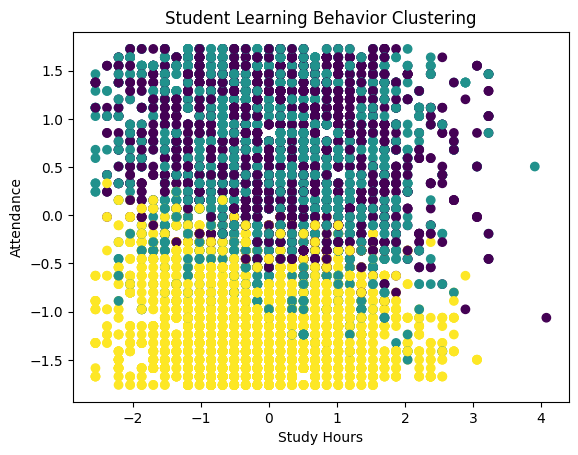

In [16]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"])
plt.xlabel("Study Hours")
plt.ylabel("Attendance")
plt.title("Student Learning Behavior Clustering")
plt.show()